--------------------------------------------
# Socio-economics factors in the world #
--------------------------------------------


## Context ##

In this case study, we will use a dataset that contains various socio-economic attributes for countries around the world.  

## Objective ##

The objective of this problem is to reduce the number of features by using dimensionality reduction techniques such as PCA and t-SNE, and extract insights about the data.

## Data dictionary ##
The data has the following attributes:

- country: Name of the country
- child_mort: Death of children under 5 years of age per 1000 live births
- exports - Exports in % of the GDP per capita
- health - The total spend on health given as % of GDP
- imports - The value of imports given as % of GDP per capita
- income - The net income per person
- inflation - Inflation rate %
- life_expec - Average life expectancy in years
- total_fer - The fertility rate - Average children per woman in the country
- gdpp - GDP per capita


### **Importing the necessary libraries**

In [2]:
# Import the important libraries

%matplotlib inline

import pandas as pd  # Library used for data manipulation and analysis

import numpy as np  # LIbrary used for working with arrays

import matplotlib.pyplot as plt  # Library for visualization

import seaborn as sns  # Library for visualization

import scipy

import warnings
warnings.filterwarnings("ignore")

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

# Importing PCA and t-SNE
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

### Loading the dataset and checking the info

In [4]:
# Loading dataset
countries = pd.read_csv('Country-data.csv')
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
countries.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [6]:
countries.shape

(167, 10)

In [7]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


###### Observations:

* There are a total of 10 columns and 167 observations in the dataset.
* There are no missing values.
* 1 column is object type, 7 are float type and 2 integer type. Column "country" is categorical.

## Summary statistics for numerical columns

In [8]:
# num_cols contain numerical varibales 
num_cols = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# Printing descriptive statistics of numerical columns
countries[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


**Observations:**
* It seems there are big differences among countries: in every feature we can find outliers.
* The median of child_mort is around 3,8% but there are countries where this attribute climbs to 21%.
* There is a country with an income that represents the 0,4% of the richest country. 
* The minimum life-expentancy is 32 years old and the maximum is 82.

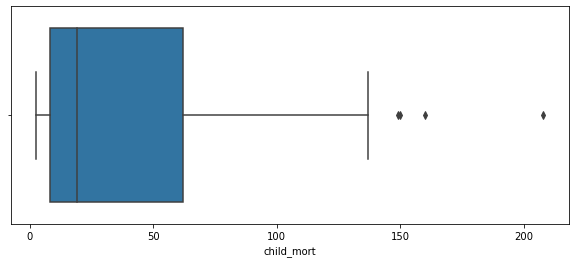

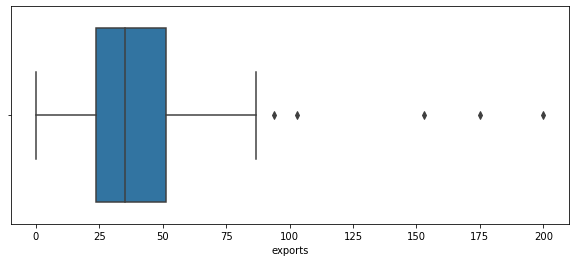

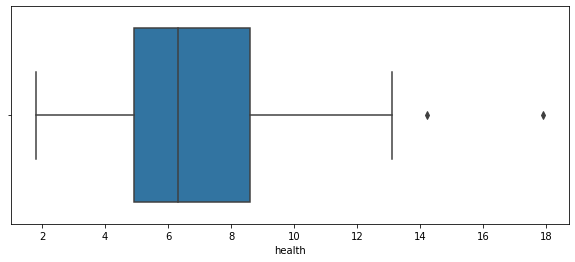

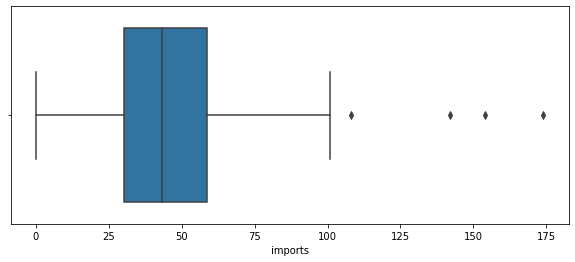

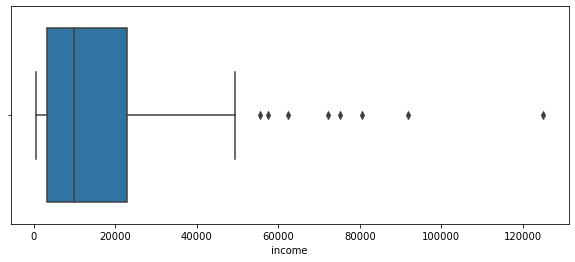

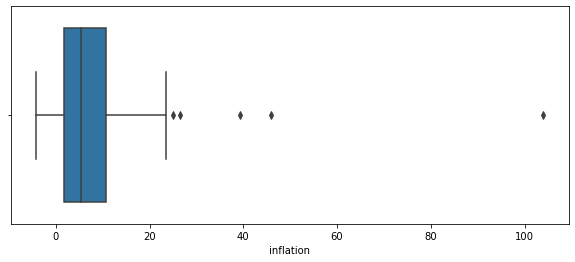

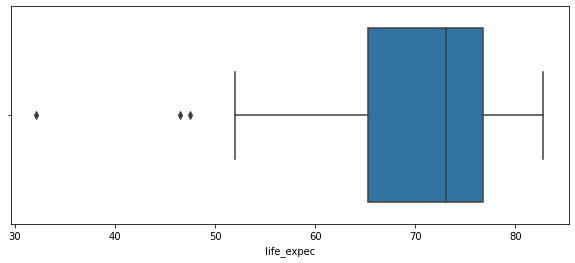

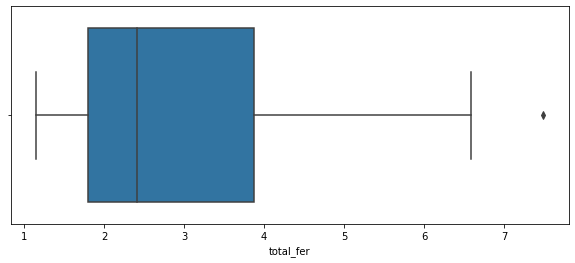

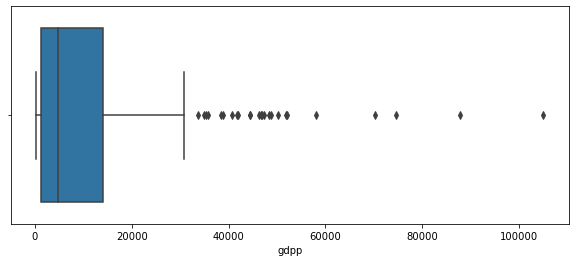

In [9]:
# Plotting boxplot for numerical columns
%matplotlib inline
for i in num_cols:
    plt.figure(figsize = (10, 4))
    sns.boxplot(x = countries[i])
    plt.show() 

**Observations:**
* There are many outliers to the right for gdpp feature.
* All features are skewed to the right except life_expect.

### **Let's check the correlation among the variables**

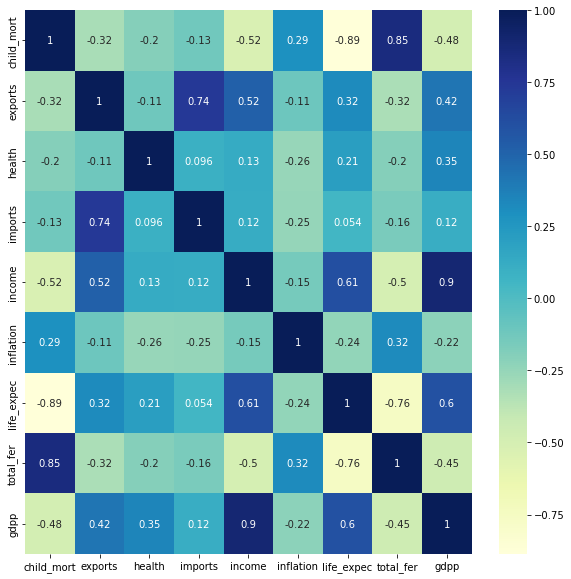

In [10]:
# Plotting the correlation map
plt.figure(figsize  = (10, 10))
sns.heatmap(countries.corr(), annot = True, cmap = "YlGnBu")
plt.show()

**Observations:**
* There is a strong correlation (0.85) between child_mort and total_fer: the greater the amount of children per woman the greater the child mortality.
* There is a strong negative correlation (-0.52) between child_mort and income which is logical. Also between child_mort and life_expec (-0.89), and gdpp (-0.48), and which are also logical.
* exports is highly correlated with income, gdpp and export, which is expected.
* income and gdpp are very highly correlated (0.9).
* The greater the amount of children per woman the smaller the life expectation (-0.76).
* In general, the greater the income of a country, the less the social and economic problems. 

In [11]:
#We are dropping the feature Country for now because we only need to group them in clusters
data_countries = countries.drop(['country'], axis=1)

### **Scaling the data**

In [12]:
scaler = StandardScaler()
countries_scaled = pd.DataFrame(scaler.fit_transform(data_countries), columns = data_countries.columns)

In [13]:
countries_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


## **Principal Component Analysis**

In [14]:
# Defining the number of principal components to generate
n = countries_scaled.shape[1]

# Finding principal components for the data
pca = PCA(n_components = n, random_state = 1)

countries_pca1 = pd.DataFrame(pca.fit_transform(countries_scaled))

# The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

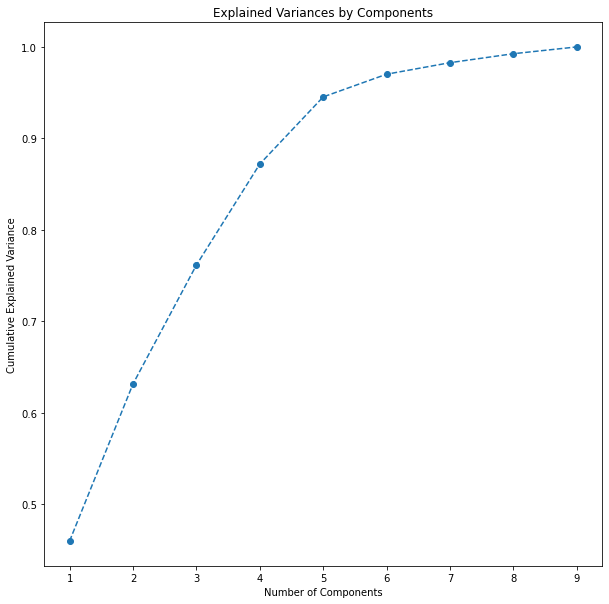

In [15]:
# Plotting the explained cumulative variance by principal components
plt.figure(figsize = (10, 10))

plt.plot(range(1, 10), exp_var.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [16]:
# Finding the least number of components that can explain more than 80% variance
sum = 0

for ix, i in enumerate(exp_var):

    sum = sum + i
    
    if(sum>0.80):
        
        print("Number of PCs that explain at least 80% variance:", ix + 1)
        break

Number of PCs that explain at least 80% variance: 4


**Observations**:

- We can see that out of the original 9 features, we have reduced the number of features through PCA to 4 principal components. The first four principal components explain approximately 80% of the original variance.

- So that is about a **56% reduction in the dimensionality of the dataset with only a loss of 20% in variance**.

Now, let us look at these **principal components as a linear combination of the original features**.

In [17]:
pc_comps = ['PC1', 'PC2', 'PC3', 'PC4']

data_pca = pd.DataFrame(np.round(pca.components_[:4,:],2), index = pc_comps, columns = countries_scaled.columns)

data_pca.T

,PC1,PC2,PC3,PC4
child_mort,-0.42,0.19,-0.03,0.37
exports,0.28,0.61,0.14,0.00
health,0.15,-0.24,-0.60,0.46
imports,0.16,0.67,-0.30,-0.07
income,0.40,0.02,0.30,0.39
inflation,-0.19,-0.01,0.64,0.15
life_expec,0.43,-0.22,0.11,-0.20
total_fer,-0.40,0.16,0.02,0.38
gdpp,0.39,-0.05,0.12,0.53


In [18]:
def color_high(val):
    
    if val < -0.25:                     # You can decide any value as per your understanding
        return 'background: pink'
    
    elif val > 0.25:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3,PC4
child_mort,-0.420000,0.190000,-0.030000,0.370000
exports,0.280000,0.610000,0.140000,0.000000
health,0.150000,-0.240000,-0.600000,0.460000
imports,0.160000,0.670000,-0.300000,-0.070000
income,0.400000,0.020000,0.300000,0.390000
inflation,-0.190000,-0.010000,0.640000,0.150000
life_expec,0.430000,-0.220000,0.110000,-0.200000
total_fer,-0.400000,0.160000,0.020000,0.380000
gdpp,0.390000,-0.050000,0.120000,0.530000


**Observations:**

- The first principal component, PC1, seems to be related to high values of exports, income, life_expect and gdpp. In the other hand it is related with low values of child_mort. The **first principal component seems to capture attributes that generally define firts world countries** 
- The second principal component, PC2, seems to be related to high values of number of imports and exports. The **second principal component seems to capture attributes that generally define countries with big industry levels.**
- The third principal component, PC2, seems to be related to high values of income and inflation, and low values of health spenditures and imports. **The third principal component, PC3, seems to be related to rich third world countries**.
- The fourth principal component, PC4, seems to be related to high values of income, health, gdpp, child_mort and fertility. The **fourth principal component seems to capture attributes that define rich countries that haven't controlled child mortality.**

**We can also visualize the data in 2 dimensions, using the first two principal components.**

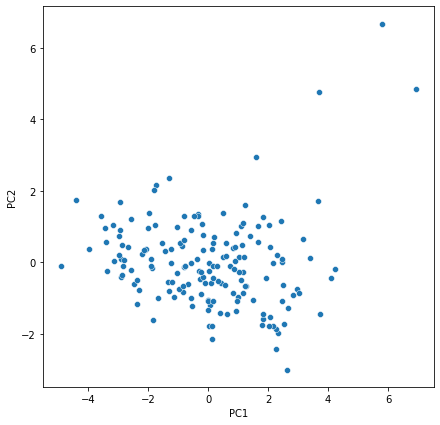

In [19]:
plt.figure(figsize = (7,7))

sns.scatterplot(x = countries_pca1[0], y = countries_pca1[1])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

**Observations:**

No visible patterns appear in the plot. Let's try with t-SNE.

### **t-SNE**

Let's try to visualize the data for different perplexity values.

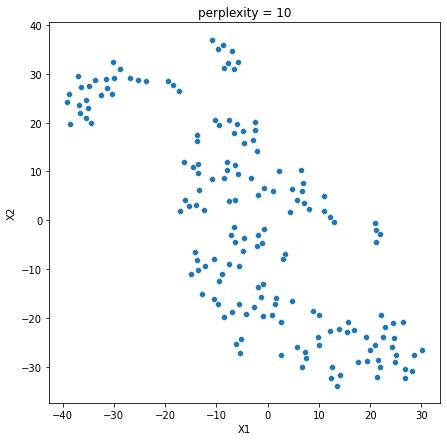

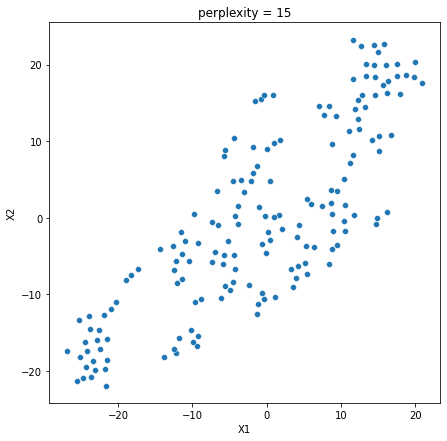

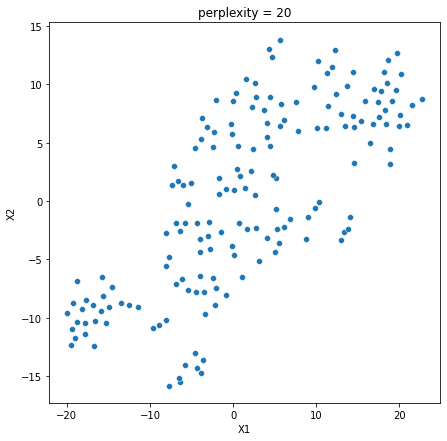

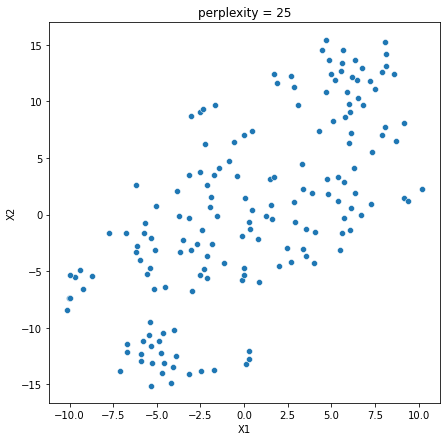

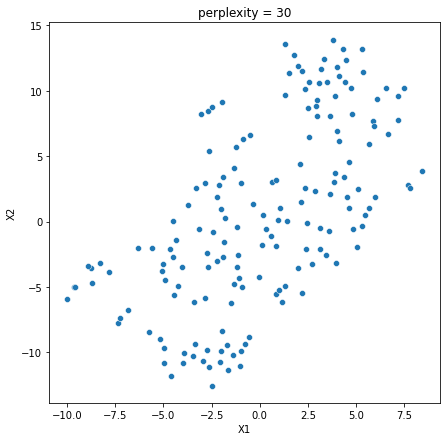

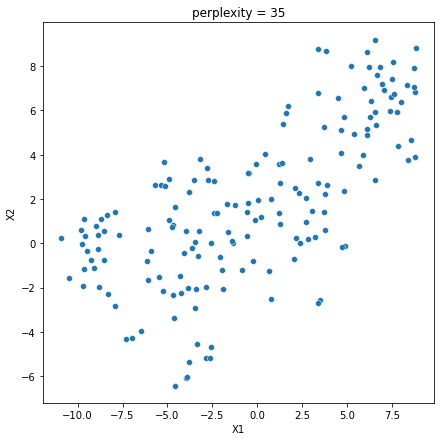

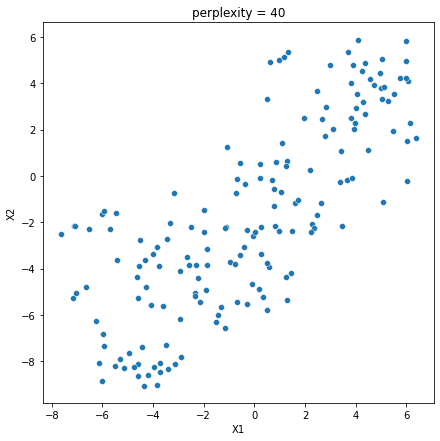

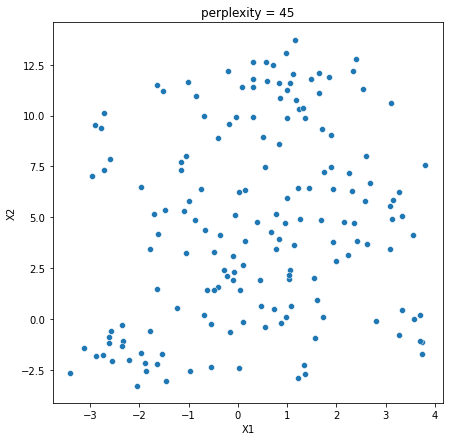

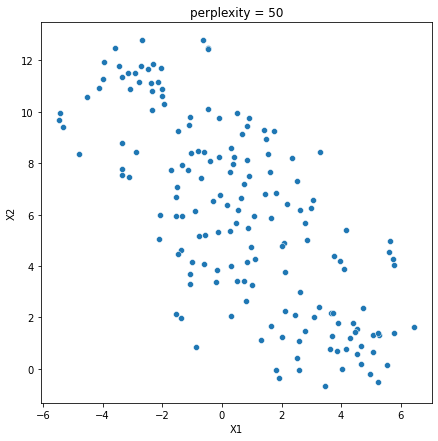

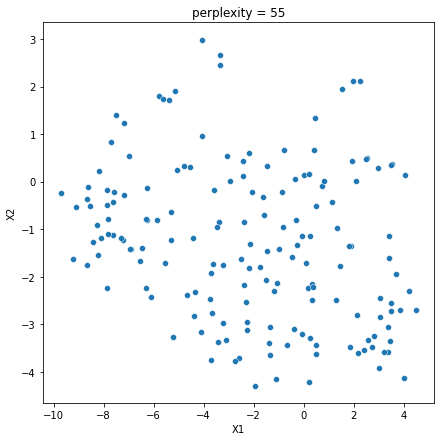

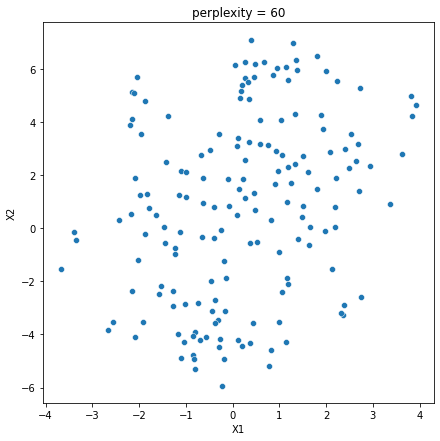

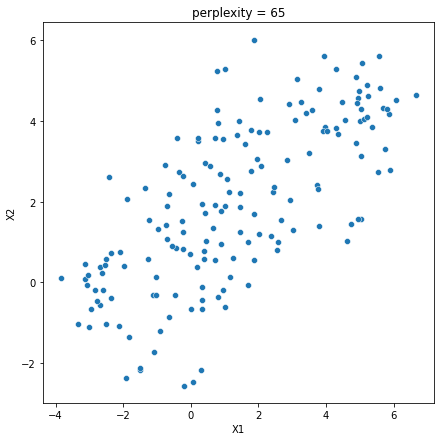

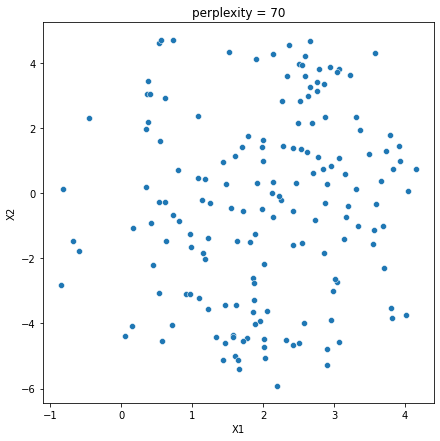

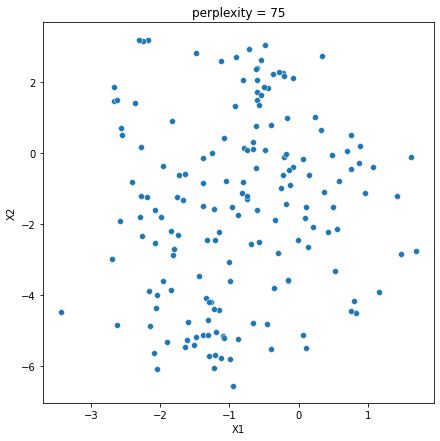

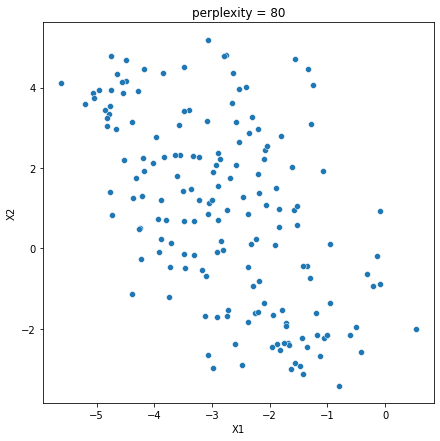

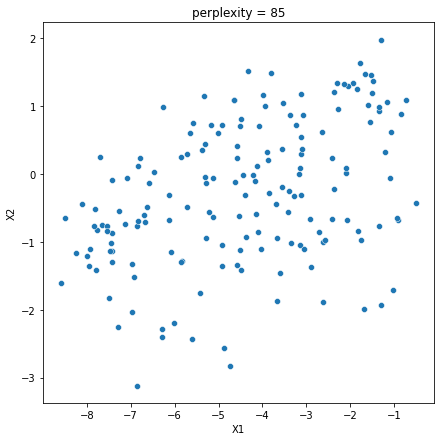

In [21]:
for i in range(10, 90, 5):
    tsne = TSNE(n_components = 2, random_state = 1, perplexity = i)
    
    data_tsne = tsne.fit_transform(countries_scaled)
    
    data_tsne = pd.DataFrame(data_tsne)
    
    data_tsne.columns = ['X1', 'X2']
    
    plt.figure(figsize = (7,7))
    
    sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne)
    
    plt.title("perplexity = {}".format(i))

**Observations:**

- We observe that perplexity value like 10 is able to capture the underlying patterns in the data better than other values.
- Let's visualize again with **perplexity equal to 10 as there are 3 groups which are distant from each other.**

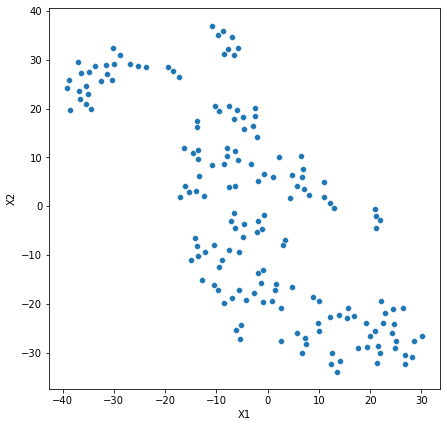

In [22]:
# Fitting t-SNE with number of components equal to 2
tsne = TSNE(n_components = 2, random_state = 1, perplexity = 10)

data_tsne = tsne.fit_transform(countries_scaled)

# Converting the embeddings to a dataframe
data_tsne = pd.DataFrame(data_tsne, columns = ["X1", "X2"])

# Scatter plot for two components
plt.figure(figsize = (7, 7))

sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne)

plt.show()

**Observations:**

- We can see **3 groups in the data**.
- Let's **label these 3 groups** using the values of the X1 and X2 axes.

In [32]:
# Let's assign points to 3 different groups
def grouping(x):
    first_component = x['X1']
    
    second_component = x['X2']
    
    if (first_component > -17) and (second_component > 29):
        return 'group_1'
    
    elif (first_component < -15) and (second_component > 18): 
        return 'group_2'
    
    else:
        return 'group_3'

In [37]:
data_tsne['groups'] = data_tsne.apply(grouping, axis = 1)

<AxesSubplot:xlabel='X1', ylabel='X2'>

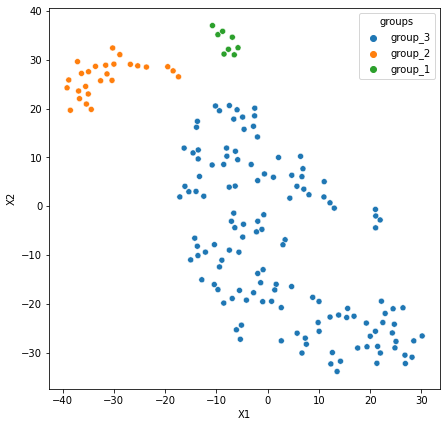

In [34]:
# Scatter plot for two components with hue
plt.figure(figsize = (7, 7))

sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne, hue = 'groups')

**Now, let's try to visualize the properties of these four groups with respect to all the numeric variables in the data.** 

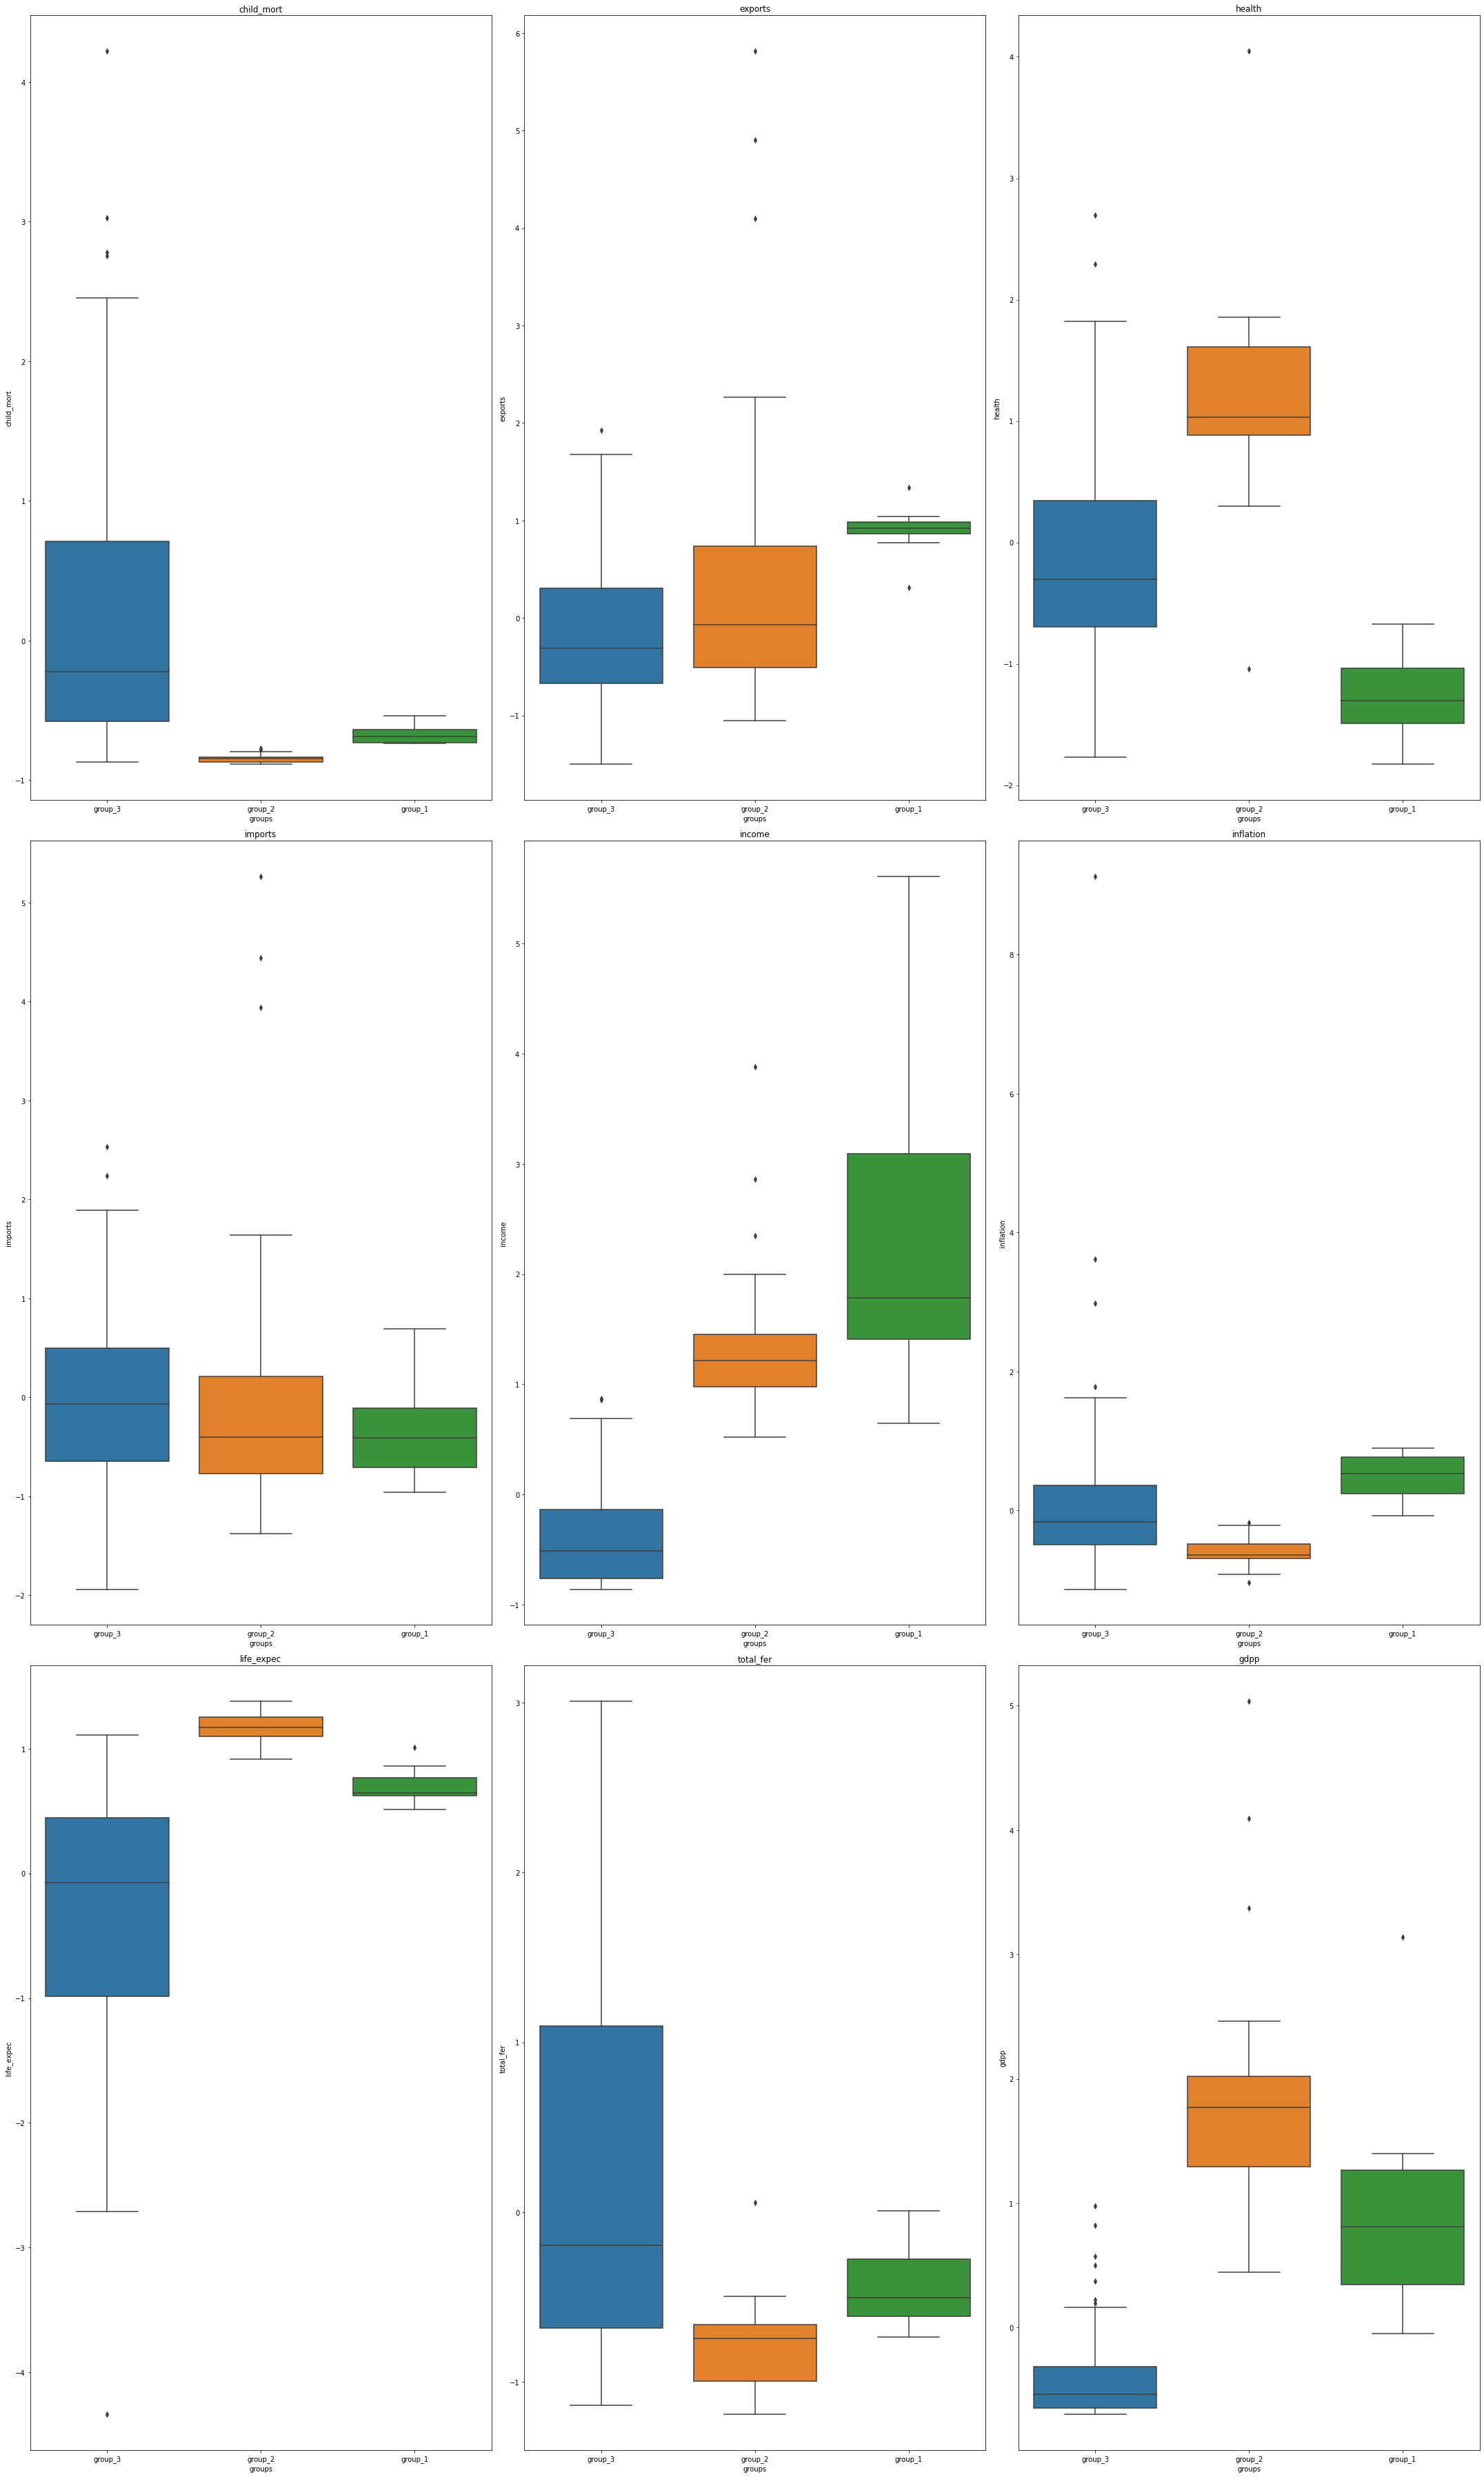

In [35]:
all_col = countries_scaled.columns[:].tolist()

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(3, 3, i + 1)
    
    sns.boxplot(y=countries_scaled[variable], x=data_tsne['groups'])
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

**Observations:**

There are three groups in the data. Each group has a different set of characteristics:

- Group 1 (green) represents countries with the highest income and exports of all. Also, they have a high gdpp and life expectation. Their mortality child rate is low as well as the imports. Also they seem not to invest to much in health programs. **Group 1 seems to be the richest countries with no too much goverment intervention**.

- **Group 2 (orange) represents developed countries with strong social programs**. This countries have high income but not as much as the group 1. Gdpp is the highest, the lowest inflation, very high life expectation and also the lowest child mortality rate.  

- **Group 3 (blue) represents undeveloped and poor countries**. This countries have a high child mortality, high fertility rate, their imports are high because they don't produce much. In the other hand they have a low income, exports and gdpp.